# Common Errors when performing alignment. 

Often times there is high background, either noise, or not enough corresponding z-slices to perform rigid image registration. Each of these issues are not necessarily mutually exclusive and can be solved

## Using a binary mask to ignore high background values in registration

If you take a look at the image below, you will see that the features in the image are quite sparse. Thus when computing alignment, if we include the intensities of the entire image the optimizer will be biased to find a solution that aligns the white space instead of the actual features. 

In [1]:
from exm.io.io import nd2ToVol
fix = nd2ToVol('/mp/nas2/Chi Zhang/WORMSeq5_20220524/Code3/Code3.nd2',7)
mov = nd2ToVol('/mp/nas2/Chi Zhang/WORMSeq5_20220524/Code5/Code5.nd2',7)

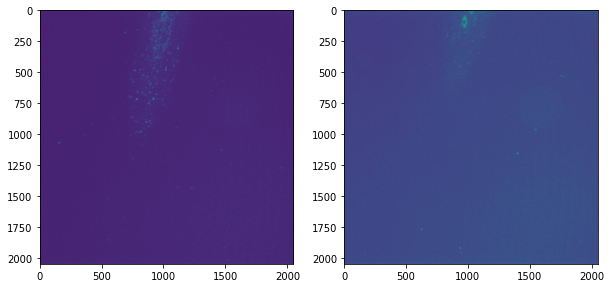

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].imshow(fix[350,:,:])
ax[1].imshow(mov[230,:,:])

Performing alignment on these two volumes does not initially work, but we use a simple mask on the fixed image by only sampling pixels that have features in them. 

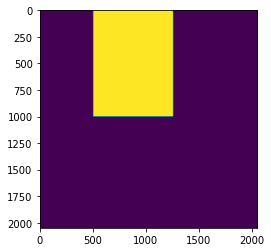

In [11]:
import numpy as np
fix_mask = np.zeros(fix.shape)
fix_mask[230:350,:1000,500:1250] = 1
plt.imshow(fix_mask[250,:,:])

In [ ]:
from exm.align.build import alignBuild
from exm.config.utils import load_cfg

cfg = load_cfg()

cfg.defrost()
cfg.ALIGN.MaximumNumberOfIterations = '250'
cfg.freeze()

align = alignBuild(cfg)
align.buildSitkTile()

# pass mask to align obj as uint8
tform = align.computeTransformMap(fix,mov,mask_fix=fix_mask.astype('uint8'))
result = align.warpVolume(mov,tform)